<a href="https://colab.research.google.com/github/maxou-uoxam/training_data_deep_learning/blob/main/Transfer_learning2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning

This notebook imports the MobileNet classification network for images classification.
- It removes the last layer and replaces it by several dense layers with a 3 dimensional output for 3 classes prediction
- It downloads a set of images from a github directory with 3 classes (cats, dogs and horses)
- The model is trained with this new data set

---
# TODO

Running this script, a model will be trained and can then be used to predict which class a new unseen image belongs to, by using model.predict(new_image).

---

1. **Run the script as is and explore** the code to answer the first questions:

  a. how many layers does the Mobilenet model has (including the original ouput layer) ?

  *-> la réponse est.... 90 - les 5 couches qu'on a ajouté + la tête qu'on a coupé : 87*

  b. how many layers are added to the transfered model to buildup the final model ?
  
  *-> 4 denses *

  c. how many parameters are added by those added layers ?

  *-> Dans la 1ère layer on a 1024 neurones qui se connecte à 1024 entrées + 1 donc plus de 1 Million. On ajoute une 2ème couche de 1024 neurones, donc 1 Million. On ajoute 512 neurones donc 500 Milles, puis 3 eurones donc 1500.*
  
  *En tout on a 2,5 Millions de paramètres dans la tête.*
  *Le modèle n'est oas raisonnable car il y a 5 millions de paramètres en tout, donc la tête en fait la moitié.*

2. **Look at the data used for training** and answer the following questions:

  a. how many images in total ?

  *-> 197*

  b. how many categories and how many images per classes ?

  *-> 3 classes and 112 for cats, 35 for dogs, 56 for horses*

  c. is data balanced ?

  *-> nop*

3. **Look at the optimization procedure** and answer the following questions:

  a. how is optimization performed and how is it validated ?

  *-> On utilise des données d'entraînement et on teste le modèle avec ces mêmes images*

  b. what should be done to fix the potential issues ?
  
  *-> Utiliser des images d'entraînement et des images de test*


4. Some script manipulations to **fix the training and validation process** and answer the following questions : 

  a. Look at the restructured dataset available in this repository : https://github.com/albenoit/transfer-learning/ : compare training data folders *traindata_1* and *traindata_2*  together and with the original train dataset in terms of number of samples per class.

  *-> le dossier traindata_1 contient le même nombre de données que l'aoriginal train dataset*
  *Je ne sais pas pour traindata_2*

  b. look at the validation folder *animals/val*, how many images per class ? Is it enough for a validation set for this case study ?

  *-> Il Y a 5 images, je ne sais pas si c'est suffisant*
  
  c. clone this repository in place of the original one using command:
  
  **!git clone https://github.com/albenoit/transfer-learning/**

  d. update the script to train on *traindata_1* or *traindata_2*

  e. **add** a new input pipeline able to **add** the validation dataset *animals/val* into the system 
  
  f. on the validation input data pipeline preprocess the images using the same preprocess_image function but avoid Shuffling
  
  g. **INFERENCE SECTION** ensure that the validation dataset is used in place (training data should not be used to check model generalization capability).

5. **Get insights on the data samples, labels and model performance **:

  a. get to section *Prediction values observation* and check the sample and label values. Why do labels have this shape [many, 3] with only binary values ?

  b. complete the code to compute the confusion matrix on the validation set

9. **Model enhancement**, some ways to improve the model:

  a. model simplification : update the model by reducing the new model head by a single Dense layer instead of the 4 initially added. and run the code, compare the obtained performance results with the initial model proposal.

  b. you can also look for data augmentation strategies to add to the trining data pipeline.

In [14]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from tensorflow.keras.optimizers import Adam

# Model design for transfer learning

In [15]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
# x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
# x=Dense(1024,activation='relu')(x) #dense layer 2
# x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(4,activation='softmax')(x) #final layer with softmax activation

In [16]:
model=Model(inputs=base_model.input,outputs=preds)
# specify the inputs and the outputs
# now a model has been created based on our architecture
# Check the architecture of the model
for i,layer in enumerate(model.layers):
  print(i,layer.name,layer.input_shape)

0 input_2 [(None, None, None, 3)]
1 conv1 (None, None, None, 3)
2 conv1_bn (None, None, None, 32)
3 conv1_relu (None, None, None, 32)
4 conv_dw_1 (None, None, None, 32)
5 conv_dw_1_bn (None, None, None, 32)
6 conv_dw_1_relu (None, None, None, 32)
7 conv_pw_1 (None, None, None, 32)
8 conv_pw_1_bn (None, None, None, 64)
9 conv_pw_1_relu (None, None, None, 64)
10 conv_pad_2 (None, None, None, 64)
11 conv_dw_2 (None, None, None, 64)
12 conv_dw_2_bn (None, None, None, 64)
13 conv_dw_2_relu (None, None, None, 64)
14 conv_pw_2 (None, None, None, 64)
15 conv_pw_2_bn (None, None, None, 128)
16 conv_pw_2_relu (None, None, None, 128)
17 conv_dw_3 (None, None, None, 128)
18 conv_dw_3_bn (None, None, None, 128)
19 conv_dw_3_relu (None, None, None, 128)
20 conv_pw_3 (None, None, None, 128)
21 conv_pw_3_bn (None, None, None, 128)
22 conv_pw_3_relu (None, None, None, 128)
23 conv_pad_4 (None, None, None, 128)
24 conv_dw_4 (None, None, None, 128)
25 conv_dw_4_bn (None, None, None, 128)
26 conv_dw_4_rel

## add a new head to the transfered model to buildup a new model adapted to our new task

Now that we have our model, as we will be using the pre-trained weights, that our model has been trained on (imagenet dataset), we have to set all the weights to be non-trainable. We will only be training the last Dense layers that we have made previously. The code for doing this is given below.

In [17]:
for layer in model.layers:
    layer.trainable=False
# or if we want to set the first 20 layers of the network to be non-trainable
for layer in model.layers[:87]:
    layer.trainable=False
for layer in model.layers[87:]:
    layer.trainable=True

# Input data pipeline(s) definition

ImageDataGenerators are built in keras and help us to train our model. We just have to specify the path to our training data and it automatically sends the data for training, in batches. It makes the code much simpler.

For that we need our training data in a particular format as mentioned earlier, and we can download such data from the following github.

In [18]:
#!git clone https://github.com/aditya9898/transfer-learning/
#!git clone https://github.com/albenoit/transfer-learning/
!git clone https://github.com/maxou-uoxam/training_data_deep_learning/

fatal: destination path 'training_data_deep_learning' already exists and is not an empty directory.


In [19]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies
# Give the path to the main dataset folder
# for example you can find the data in the link
# https://github.com/aditya9898/transfer-learning/tree/master/train
# for that clone the github directory
# #!git clone https://github.com/aditya9898/transfer-learning/
train_generator=train_datagen.flow_from_directory('./training_data_deep_learning/train',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=20,
                                                 class_mode='categorical',
                                                 shuffle=True)
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies
test_generator=test_datagen.flow_from_directory('./training_data_deep_learning/valid',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=20,
                                                 class_mode='categorical',
                                                 shuffle=True)


Found 80 images belonging to 4 classes.
Found 16 images belonging to 4 classes.


# Model optimization

For this we first compile the model that we made, and then train our model with our generator. This can be done using the code below.



In [20]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
model.fit(x=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10)

Epoch 1/10
4/4 [==============================] - 3s 217ms/step - loss: 1.6444 - accuracy: 0.2625
Epoch 2/10
4/4 [==============================] - 1s 264ms/step - loss: 1.0525 - accuracy: 0.5875
Epoch 3/10
4/4 [==============================] - 1s 258ms/step - loss: 0.6642 - accuracy: 0.7875
Epoch 4/10
4/4 [==============================] - 1s 269ms/step - loss: 0.4056 - accuracy: 0.9250
Epoch 5/10
4/4 [==============================] - 1s 244ms/step - loss: 0.2745 - accuracy: 0.9750
Epoch 6/10
4/4 [==============================] - 1s 270ms/step - loss: 0.1782 - accuracy: 0.9875
Epoch 7/10
4/4 [==============================] - 1s 273ms/step - loss: 0.1329 - accuracy: 1.0000
Epoch 8/10
4/4 [==============================] - 1s 259ms/step - loss: 0.1011 - accuracy: 1.0000
Epoch 9/10
4/4 [==============================] - 1s 265ms/step - loss: 0.0781 - accuracy: 1.0000
Epoch 10/10
4/4 [==============================] - 1s 267ms/step - loss: 0.0635 - accuracy: 1.0000


In [21]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, None, None, 32)   128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)   288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, None, None, 32)   128       
 ation)                                                    

# Inference

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(16, 4)


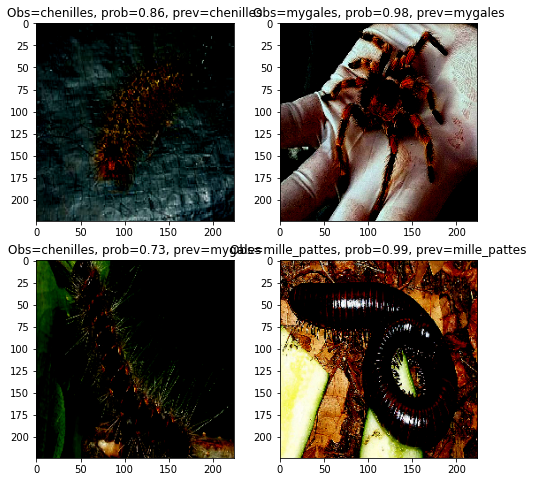

In [28]:
# INFERENCE SECTION

# Get validation images and compute their predictions
# plot images together with the predicted class in the title as well as its posterior probability

x , y = test_generator.next()
import numpy as np

#x= np.random.uniform(size=[4, 224, 224, 3])
#x , y = test_generator.next()
categories =sorted(os.listdir('training_data_deep_learning/valid'))
prev = model.predict(x)
print(prev.shape)

# plot three images and print their class
import  matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
for j in range(4):
  plt.subplot(2,2,j+1)
  plt.imshow(x[j])
  plt.title('Obs={id}, prob={p:.2f}, prev={pred}'.format(id=categories[np.argmax(y[j])], pred=categories[np.argmax(prev[j])],p=np.max(prev[j])))

In [23]:
y_true = np.argmax(y, axis=1)
y_prev = np.argmax(prev, axis=1)
print(y_true)
print(y_prev)

[2 2 0 3 1 2 1 0 1 3 1 3 3 0 0 2]
[2 2 0 3 3 2 1 0 1 3 1 3 3 2 0 2]


In [24]:
import sklearn.metrics

cf = sklearn.metrics.confusion_matrix(y_true, y_prev)

print(cf)

# Calcul de l'accracy
np.diag(cf).sum() / cf.sum()
sklearn.metrics.accuracy_score(y_true, y_prev)


[[3 0 1 0]
 [0 3 0 1]
 [0 0 4 0]
 [0 0 0 4]]


0.875